In [2]:
import numpy as np
import pickle
from copy import deepcopy
from go_plot import plot_play_probabilities

In [3]:
def name_to_coord(name):
    if name == 'PASS':
        return (-1, -1)

    col = indexLetters[name[0]]
    lin = int(name[1:]) - 1

    return (col, lin)


def coord_to_flat(coord):
    if coord == (-1, -1):
        return 81
    return 9 * coord[1] + coord[0]


def name_to_flat(name):
    return coord_to_flat(name_to_coord(name))


def listify(samples):
    for i in range(len(samples)):
        samples[i] = list(samples[i])
    return samples


def tuplefy(samples):
    for i in range(len(samples)):
        samples[i] = tuple(samples[i])
    return samples

def as_board(splitted):
    return splitted[0] + 2 * splitted[1]


def create_table(np_func):
    orig = np.arange(81).reshape((9,9))
    rot = np_func(orig)

    table = np.zeros(81)
    for i in range(9):
        for j in range(9):

            orig_idx = (j, i)
            orig_flat = coord_to_flat(orig_idx)

            whr = np.where(rot == orig_flat)
            to_idx = (whr[1][0], whr[0][0])
            to_flat = coord_to_flat(to_idx)

            table[orig_flat] = to_flat
    return table
            

def do_op(probs, table):
    
    out = np.zeros(82)
    for k in range(81):
        out[int(table[k])] = probs[k]
        
    out[81] = probs[81]
    
    return out


ROT_TABLE = create_table(np.rot90)
FLIP_TABLE = create_table(np.flipud)


def rot90(probs):
    global ROT_TABLE
    return do_op(probs, ROT_TABLE)


def flipud(probs):
    global FLIP_TABLE
    return do_op(probs, FLIP_TABLE)

In [ ]:
f = open('./samples.npy', 'rb')
samples = pickle.load(f)
f.close()
len(samples)

In [ ]:
def augmentate(samples):
    size = len(samples)
    samples = listify(samples)
    augmentated_samples = deepcopy(samples)

    for _ in range(7):
        augmentated_samples += deepcopy(samples)
    
    for rot in range(1, 4):
        for idx in range(size):
            for k in range(15):
                augmentated_samples[rot*size + idx][0][k] = np.rot90(augmentated_samples[(rot-1)*size + idx][0][k])
            augmentated_samples[rot*size + idx][1] = rot90(augmentated_samples[(rot-1)*size + idx][1])

    for mirror in range(4, 8):
        for idx in range(size):
            for k in range(15):
                augmentated_samples[mirror*size + idx][0][k] = np.flipud(augmentated_samples[(mirror-4) * size + idx][0][k])
            augmentated_samples[mirror*size + idx][1] = flipud(augmentated_samples[(mirror-4) * size + idx][1])
    
    return tuplefy(augmentated_samples)

In [ ]:
a = augmentate(samples[0:50])

In [ ]:
plot_play_probabilities(as_board(a[2][0][0:2]), a[2][1], is_real_board=True)

In [ ]:
plot_play_probabilities(as_board(a[52][0][0:2]), a[52][1], is_real_board=True)

In [ ]:
plot_play_probabilities(as_board(a[102][0][0:2]), a[102][1], is_real_board=True)

In [ ]:
plot_play_probabilities(as_board(a[202][0][0:2]), a[202][1], is_real_board=True)

In [4]:
f = open('./samples_aug.npy', 'rb')
a = pickle.load(f)
f.close()

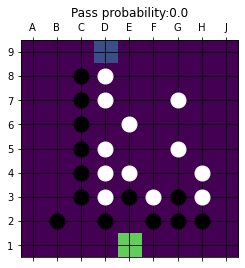

In [5]:
initial = 1
to_add = 36659
hist = 1
plot_play_probabilities(as_board(a[initial][0][2*hist:2*hist+2]), a[initial][1], is_real_board=True)

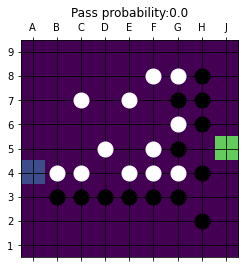

In [6]:
plot_play_probabilities(as_board(a[initial+to_add][0][2*hist:2*hist+2]), a[initial+to_add][1], is_real_board=True)

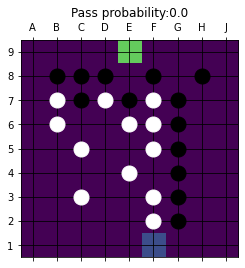

In [12]:
plot_play_probabilities(as_board(a[initial+2*to_add][0][2*hist:2*hist+2]), a[initial+2*to_add][1], is_real_board=True)

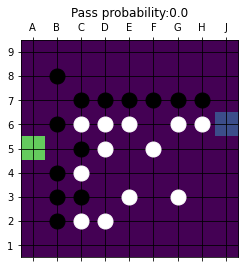

In [13]:
plot_play_probabilities(as_board(a[initial+3*to_add][0][2*hist:2*hist+2]), a[initial+3*to_add][1], is_real_board=True)

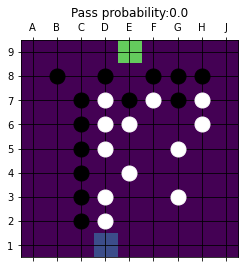

In [14]:
plot_play_probabilities(as_board(a[initial+4*to_add][0][2*hist:2*hist+2]), a[initial+4*to_add][1], is_real_board=True)

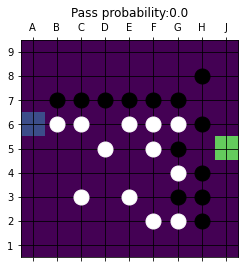

In [15]:
plot_play_probabilities(as_board(a[initial+5*to_add][0][2*hist:2*hist+2]), a[initial+5*to_add][1], is_real_board=True)

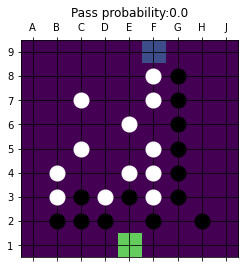

In [16]:
plot_play_probabilities(as_board(a[initial+6*to_add][0][2*hist:2*hist+2]), a[initial+6*to_add][1], is_real_board=True)